## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: VirProBERT

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [5]:
import seaborn

In [6]:
seaborn.__version__

'0.11.2'

In [3]:
import sys
import os
from pathlib import Path
# sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", ".."))
# sys.path
INPUT_PATH = "/data/sipek/zoonosis/output/raw/uniprotkb_cd_hit_embl_vertebrates_non_idv_hev/20250331/host_multi/mlm_tfenc_l6_h8_lr1e-4_uniprotkb_hepeviridae_cd-hit_hybrid_attention_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-5_output.csv"
MY_PATH = "/data/sipek/zoonosis"

In [19]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
os.chdir("/home/sipek/zoonosis/")
from src.utils import utils, evaluation_utils, visualization_utils

In [20]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"

def class_wise_auprc_analysis(output_filepaths, classes, figure_output_filepath):
    auprc_results = []
    all_classes = classes
    for model, output_filepath in output_filepaths.items():
        df = pd.read_csv(output_filepath, index_col=0)
        print(f"Read output {model} = {df.shape}")
        
        cols = df.columns
        classes = list(set(cols) - set([itr_col, experiment_col, y_true_col]))
        itrs = df[itr_col].unique()
    
        for itr in itrs:
            df_itr = df[df[itr_col] == itr]
            _, auprcs_df = evaluation_utils.compute_class_auprc(df_itr, y_pred_columns=classes, y_true_col=y_true_col)
            auprcs_df["model"] = model
            auprcs_df["itr"] = itr
            auprc_results.append(auprcs_df)
    metadata = utils.compute_class_distribution(df_itr, y_true_col, format=False)
    metadata_formatted = utils.compute_class_distribution(df_itr, y_true_col, format=True)
    metadata_sorted = {}
    for k, v in metadata.items():
        metadata_sorted[metadata_formatted[k]] = v
    for cls in all_classes:
        if not any(cls in key for key in metadata_sorted.keys()):
            metadata_sorted[cls] = []
    auprc_results_df = pd.concat(auprc_results, ignore_index=True)
    auprc_results_df.replace({"class":metadata_formatted}, inplace=True)
    
    FIGURE_CONFIG = {
        "figsize": (16, 10),
        "xtick.labelsize": 20,
        "ytick.labelsize": 20    
    }

    visualization_utils.pre_plot_config(FIGURE_CONFIG)
    ax = sns.boxplot(data=auprc_results_df, x="class", y="auprc", hue="model", 
                     order=metadata_sorted, linewidth=2.5, fliersize=5,
                     palette="colorblind")
    plt.draw()
    
    ax.set_ylim(0, 1)
    ax.set_ylabel("AUPRC", size=22)
    ax.set_xlabel("", size=22, labelpad=2)
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
    plt.setp(ax.get_legend().get_texts(), fontsize=20)
    visualization_utils.wrap_ticklabels(ax, axis="x")
    visualization_utils.view(figure_output_filepath)
    print(figure_output_filepath)
    plt.show()
    return auprc_results_df

In [25]:
output_filepaths = {
    # "ProstT5_1%": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/external/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev1%_prostt5_msl2048_bn_fnn_2l_d1024_lr3e-4_output.csv"),
    # "ProstT5_2%": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/external/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev2%_prostt5_msl2048_bn_fnn_2l_d1024_lr3e-4_output.csv"),
    # "ProstT5_PiHu": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/external/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev_PiHu_prostt5_msl2048_bn_fnn_2l_d1024_lr3e-4_output.csv"),
    # "ProstT5_BrHu": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/external/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev_BrHu_prostt5_msl2048_bn_fnn_2l_d1024_lr3e-4_output.csv"),
    # "ESM2_1%": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/external/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev1%_esm2_msl2048_bn_fnn_2l_d1024_lr1e-4_output.csv"),
    # "ESM2_2%": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/external/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev2%_esm2_msl2048_bn_fnn_2l_d1024_lr1e-4_output.csv"),
    # "ESM2_PiHu": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/external/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev_PiHu_esm2_msl2048_bn_fnn_2l_d1024_lr1e-4_output.csv"),
    # "ESM2_BrHu": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/external/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev_BrHu_esm2_msl2048_bn_fnn_2l_d1024_lr1e-4_output.csv"),
    "VirProBERT": os.path.join(INPUT_PATH),
    # "VirProBERT_2%": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev2%_hybrid_attention_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-5_output.csv"),
    # "VirProBERT_PiHu": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev_ph_hybrid_attention_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-5_output.csv"),
    # "VirProBERT_BrHu": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_hev/20241029/host_multi/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hev_brh_hybrid_attention_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-5_output.csv")
     
    
}
classes = ["Human", "Brown rat","Swine", "Wild boar", "Chevrier's field mouse" ]

Read output VirProBERT = (125, 7)
/data/sipek/zoonosis/output/visualization/auprc_plots/0325/host_multi_weights_classwise_aurpc_boxplot.pdf


<Figure size 640x480 with 0 Axes>

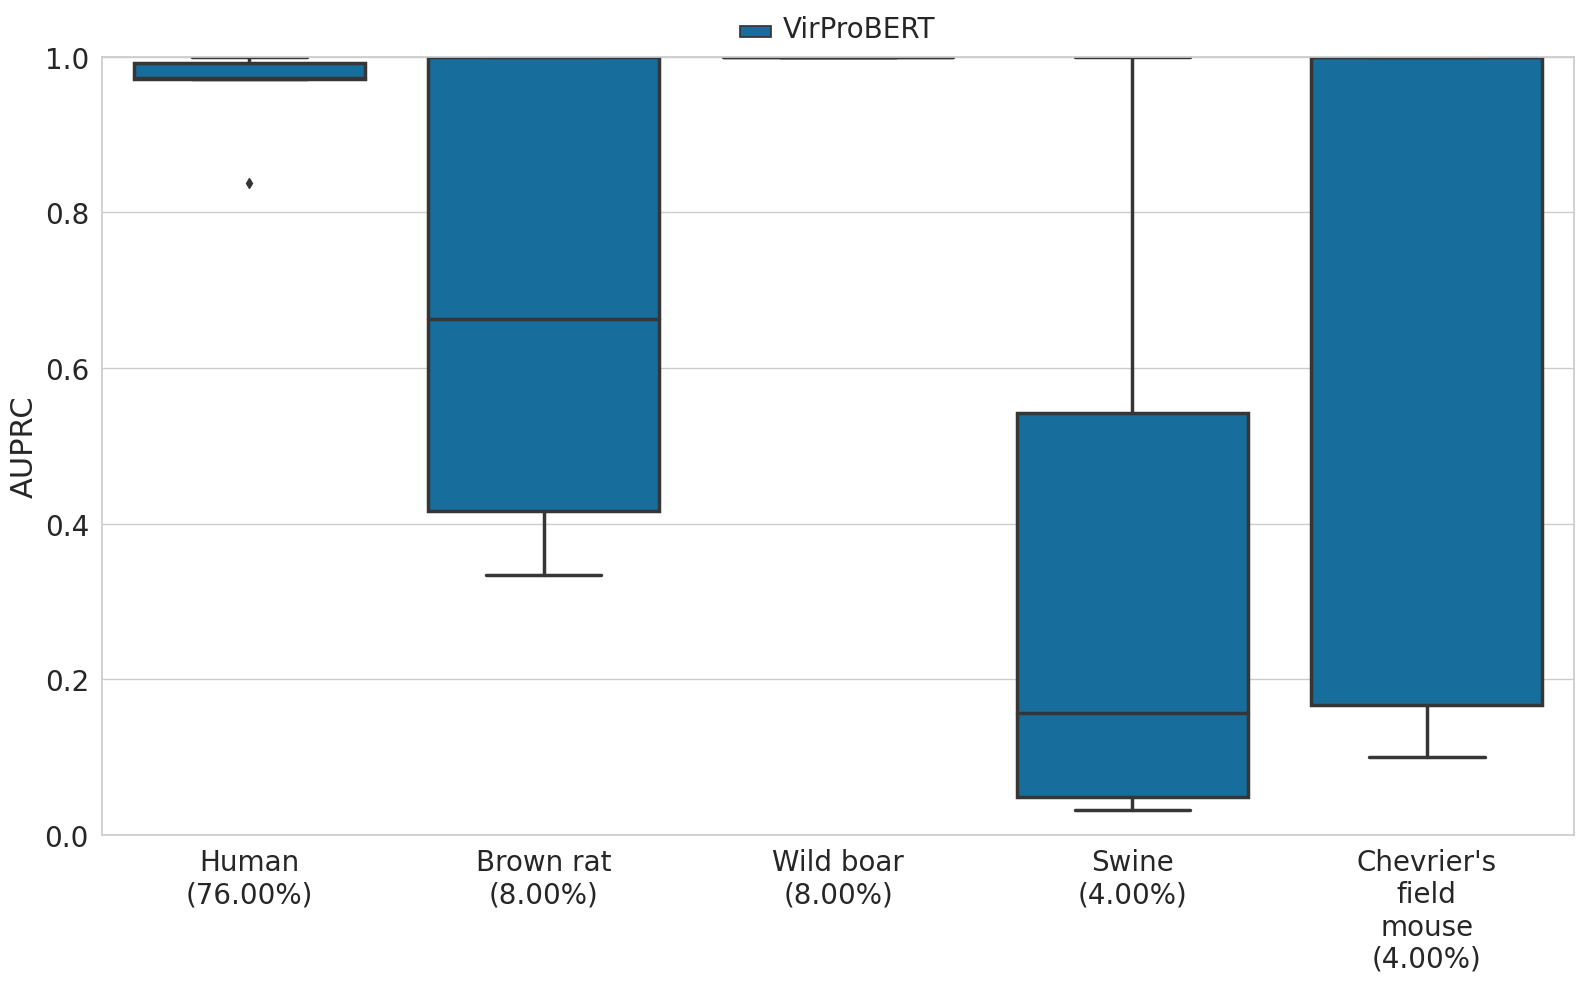

In [26]:
# figure_output_filepath = os.path.join(os.getcwd(), "..","..", "..", "..", "output/visualization/auprc_plots/0225/host_multi_all_models_classwise_aurpc_boxplot.pdf")
figure_output_filepath = os.path.join(MY_PATH, "output/visualization/auprc_plots/0325/host_multi_weights_classwise_aurpc_boxplot.pdf")
Path(os.path.dirname(figure_output_filepath)).mkdir(parents=True, exist_ok=True)
auprc_results_df = class_wise_auprc_analysis(output_filepaths, classes, figure_output_filepath)

In [24]:
auprc_results_macro = auprc_results_df[["model", "class", "auprc"]].groupby(["model", "class"]).mean("auprc")
auprc_results_macro
results_filepath = os.path.join(MY_PATH, "output/visualization/auprc_plots/033125/host_multi_weights_classwise_aurpc_macro.csv")
auprc_results_macro.to_csv(results_filepath)